# Combinations of uud measurements

In [1]:
# libraries
import json
import sys, os
sys.path.append('../coco')
sys.path.append('../inputs')

In [2]:
from HelperFunctions import showIminuitResult, showIminuitMinosResult, showIminuitResultCorrmat, outputMinuitResult, EvaluateForMinuit
from HelperFunctions import printLatexTable, printChi2nDoF, makeResidualPlot
from ResultSet import *
from iminuit import Minuit
import pylab as pl
sys.path.append("./")
from scipy import stats, special

In [7]:
inputfilelist = [
    "ResultList_pi+pi-.json"
]
#Set up your i/o paths
inputpath = '../inputs/uudMeasurements/'
outputpath = '../outputs/uudMeasurements/'
print('\nThe combination has been configured with these Input file(s):\n ',inputfilelist)

# check if input/output folders exist and otherwise create them
if not os.path.exists(inputpath):
    os.makedirs(inputpath)
if not os.path.exists(outputpath):
    os.makedirs(outputpath)


The combination has been configured with these Input file(s):
  ['ResultList_pi+pi-.json']


In [8]:
reslist = readResultListJSON(inputfilelist, inputpath=inputpath, outputpath=outputpath)


readResultListJSON: is reading the ResultSet files
ResultList_pi+pi-.json

readResultListJSON:  Output written all files combined into:  ../outputs/uudMeasurements/CombinationInputOnefile.json

readResultListJSON: is reading the Intercorrelartion configuration files

SanityCheck: Performing self sanity check of ResultList big correlation matrix

SanityCheck: PASSED


In [9]:
#Now choose what you want to include in this average  (these flags are used below just before the fit)
doStatisticalCorrelations = True
doSystematics = True
doSystematicCorrelations = False
doIntercorrelations = False

In [11]:
pars = reslist.getUniqueParameters()

In [10]:
#Show all systematic errors and full correlation matrix
reslist.showAll(PrintCorrMat=True,PrintCovMat=True)


--------------------------------------
ShowAll (all details)


----------ResultSet------------
Label =  BaBar 

Description:
PRD 87 (2013) 052009


S_CP            :  	 -0.68  +/-  0.1  +/-    0.0300      =       -0.68  +/-    0.1044
C_CP            :  	 -0.25  +/-  0.08  +/-    0.0200      =       -0.25  +/-    0.0825

Statistical Correlation Matrix:
   1.00	-0.06	
  	 1.00	

Systematic Error: TotalSyst
[0.03 0.02]
   1.00	 0.00	
  	 1.00	

Correlation Matrix:
   1.00	-0.05	
  	 1.00	

----------ResultSet------------
Label =  Belle 

Description:
PRD 88 (2013) 092003


S_CP            :  	 -0.64  +/-  0.08  +/-    0.0300      =       -0.64  +/-    0.0854
C_CP            :  	 -0.33  +/-  0.06  +/-    0.0300      =       -0.33  +/-    0.0671

Statistical Correlation Matrix:
   1.00	-0.10	
  	 1.00	

Systematic Error: TotalSyst
[0.03 0.03]
   1.00	 0.00	
  	 1.00	

Correlation Matrix:
   1.00	-0.08	
  	 1.00	

----------ResultSet------------
Label =  LHCb Average 

Description:
JHEP 210

In [13]:
#Show the set of unique parameters for info
print('\n It has unique parameters: ', ['{:10s}'.format(par) for par in reslist.getUniqueParameters()])



 It has unique parameters:  ['C_CP      ', 'S_CP      ']


In [14]:
print('\n-------------Doing the combination--------------')
#Set the chosen error treatment flags
reslist.setErrorTreatmentFlags( doStatCorr=doStatisticalCorrelations, doSyst=doSystematics, doSystCorr=doSystematicCorrelations, doIntercorr=doIntercorrelations )


-------------Doing the combination--------------


In [15]:
#Create the EvaluateFotMinuit object which provides the FCN interface
eval = EvaluateForMinuit( reslist, pars )

In [16]:
# Get the dictionary with all parameters, their start values and their initial setepsize (errors)
svals = reslist.getStartValues( pars )

In [17]:
# Now get the numerical list of starting values out of the dictionary in the correct order for the Minuit constructor
start =[ svals[p] for p in pars ]

In [18]:
# Create Minimiser with special constructor.
# The names and order of parameters is given by pars
m = Minuit(eval.fcn, start, name=pars)
m.errordef = 1.0
m.print_level = 0
m.tol = m.tol*0.0001


In [19]:
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7795                     │              Nfcn = 55               │
│ EDM = 5.72e-26 (Goal: 2e-08)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C_CP │  -0.311   │   0.030   │   -0.030   │   0.030    │         │         │       │
│ 1 │ S_CP │  -0.666   │   0.029   │   -0.029   │   0.029    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │         C_CP          │         S_CP          │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.03   │   0.03    │  -0.029   │   0.029   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌──────┬───────────────────┐
│      │     C_CP     S_CP │
├──────┼───────────────────┤
│ C_CP │ 0.000909   0.3e-3 │
│ S_CP │   0.3e-3 0.000862 │
└──────┴───────────────────┘

In [20]:
showIminuitResult(m)


IMinuit average 
   C_CP            :  	  -0.3113  +/-    0.0301
   S_CP            :  	  -0.6664  +/-    0.0294




In [21]:
showIminuitMinosResult(m)


IMinuit MINOS average 
   C_CP            :  	  -0.3113  +  0.0301  -0.0301
   S_CP            :  	  -0.6664  +  0.0294  -0.0294




In [22]:
showIminuitResultCorrmat(m)


 Final Corrmat: 
   1.00	 0.29	
  	 1.00	


In [23]:
chisqndof = printChi2nDoF(reslist, m)

nInputs = 6 nFitParams= 2
chi2 = 0.78 nDoF = 4.0 chi2/nDoF = 0.195 p-value = 0.941175


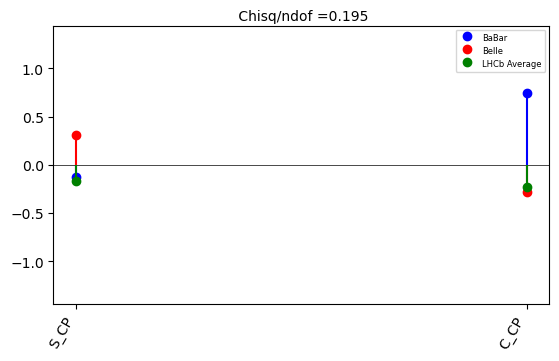

In [24]:
#Make residuals plot all points
makeResidualPlot( chisqndof, reslist, m, outputpath+'PullPlot.pdf' )

In [26]:
#output the full result in JSON format for use in a subsequent average
reslist.outputSimpleAverage(outputFileName=outputpath+'AverageResultSet_pi+pi-.json', title='Simp.Avg.' )
outputMinuitResult( m, outputFileName=outputpath+'AverageResultSet_pi+pi-.json', title='Comb', minos=True )


Output file written:  JSON file containing simple average ResultSet: ../outputs/uudMeasurements/AverageResultSet_pi+pi-.json
Output file written:  JSON file containing final combined ResultSet: ../outputs/uudMeasurements/AverageResultSet_pi+pi-.json


In [27]:
latexLabels = {
    'S_CP': '$S_{C/!P}$',
    'C_CP': '$C_{C/!P}$',
}

In [29]:
printLatexTable( m, latexLabels, outputFileName=outputpath+'AverageLatexTable_pi+pi-.tex' )

Output file written:  Latex Table containing core of correlation matrix: ../outputs/uudMeasurements/AverageLatexTable_pi+pi-.tex
